In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Loading

In [3]:


data = pd.read_csv('spam.csv', encoding = 'windows-1252')
df = pd.DataFrame(data)
df.head(3)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


## Initial Data inspection & data cleaning

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
## Drop last 3 cols

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
df.sample(5)

,v1,v2
3851,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?"
3228,spam,Ur cash-balance is currently 500 pounds - to m...
3396,ham,Heehee that was so funny tho
394,ham,Pick you up bout 7.30ish? What time are and t...
4954,ham,Doing my masters. When will you buy a bb cos i...


In [8]:
# Renaming the cols

df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
print(df.dtypes)

target    object
text      object
dtype: object


In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:

df = df.drop_duplicates(keep = 'first')


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(5169, 2)

## Feature Engineering
-Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])


In [17]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import nltk


In [20]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df['num_words'] = df['text'].apply(lambda x : nltk.word_tokenize(x))

In [24]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [25]:
df_nww = df[['target','num_characters', 'num_sentences']]

In [26]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_sentences
count,5169.000000,5169.000000
mean,78.977945,1.965564
std,58.236293,1.448541
min,2.000000,1.000000
25%,36.000000,1.000000
50%,60.000000,1.000000
75%,117.000000,2.000000
max,910.000000,38.000000


In [27]:
# ham
df[df['target'] == 0 ] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_sentences
count,4516.000000,4516.000000
mean,70.459256,1.820195
std,56.358207,1.383657
min,2.000000,1.000000
25%,34.000000,1.000000
50%,52.000000,1.000000
75%,90.000000,2.000000
max,910.000000,38.000000


In [28]:
# spam
df[df['target'] == 1] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_sentences
count,653.000000,653.000000
mean,137.891271,2.970904
std,30.137753,1.488425
min,13.000000,1.000000
25%,132.000000,2.000000
50%,149.000000,3.000000
75%,157.000000,4.000000
max,224.000000,9.000000


## EDA (exploratory data analysis)

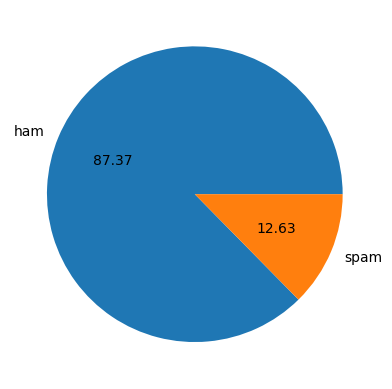

In [29]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

<Axes: xlabel='num_characters', ylabel='Count'>

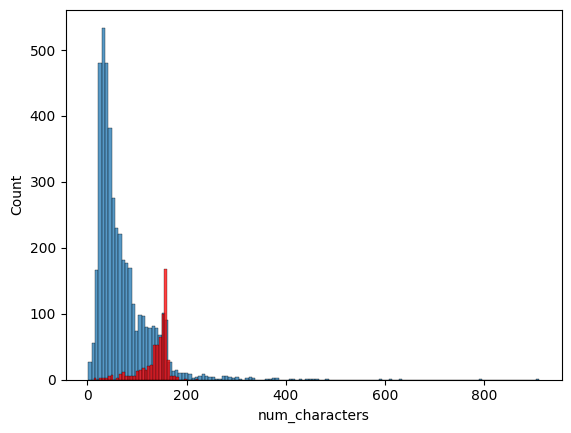

In [30]:
sns.histplot(df[df['target'] == 0 ] [ 'num_characters'])
sns.histplot(df[df['target'] == 1 ] ['num_characters'], color = 'red')

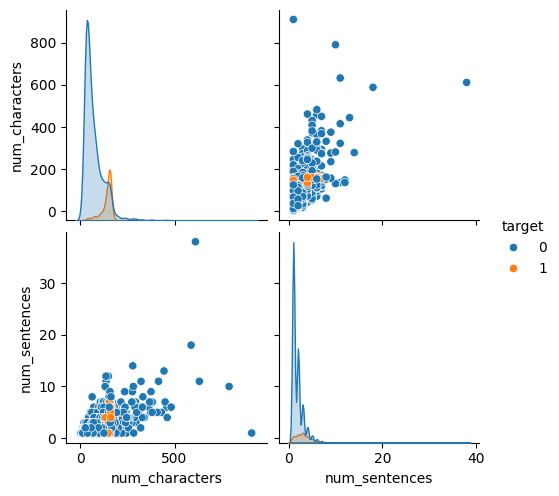

In [31]:
sns.pairplot(df, hue = 'target')

<Axes: >

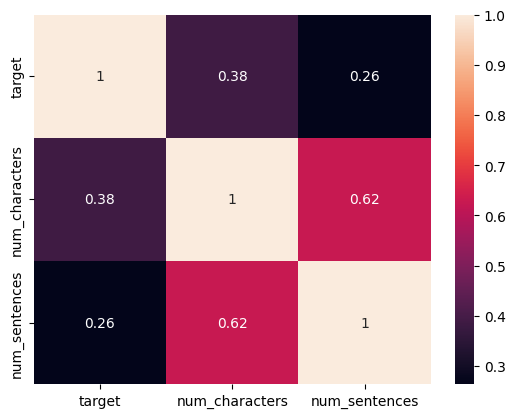

In [32]:
sns.heatmap(df_nww.corr(), annot = True)

In [33]:
df_nww.head(3)

,target,num_characters,num_sentences
0,0,111,2
1,0,29,2
2,1,155,2


**Text Preprocessing**


*   Lower Case

*   Tokenization

*   Removing Special characters

*   Removing stop words and punctuation


*   Stemming

*   Graphical Visaulisation through WordCloud

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# NLTK resources downloading
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    # Text ko lowercase mein convert karna
    text = text.lower()

    # Tokenize karna text ko (words mein todna)
    text = nltk.word_tokenize(text)

    # Initialize stopwords aur stemmer
    ps = PorterStemmer()

    # Empty list to store filtered words
    y = []

    # Pehla loop: Alphanumeric words ko filter karna
    for i in text:
        if i.isalnum(): 
            y.append(i)


    # List ko update karna, jab first loop ka kaam ho gaya
    text = y[:]
    y.clear()


    # Dusra loop: Stopwords aur punctuation hataana
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Text ko update karte hain filtered words ke saath
    text = y[:]
    y.clear()

    # Teesra loop: Stemming karna
    for i in text:
        y.append(ps.stem(i))

    # Final result ko join karke return karna
    return " ".join(y)




[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [35]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [36]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud

In [39]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'magenta')

In [40]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

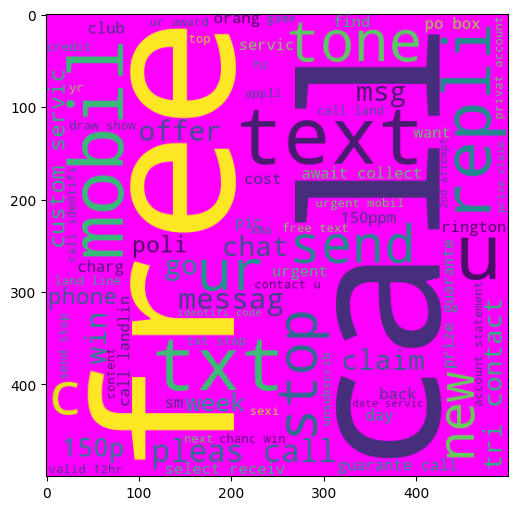

In [41]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [42]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

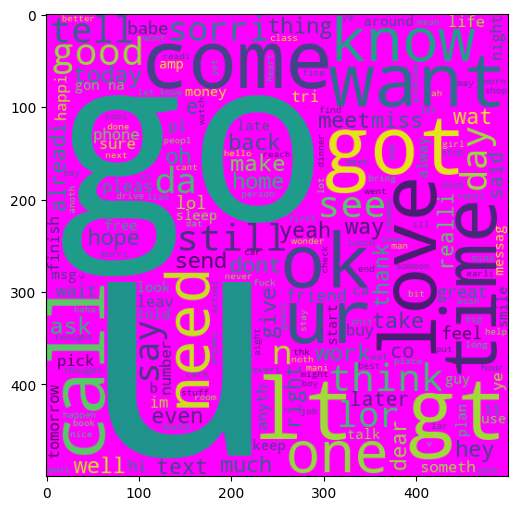

In [43]:
plt.figure(figsize = (15, 6))
plt. imshow(ham_wc)

In [44]:
spam_corpus = []
for msg in df[df['target'] == 1] ['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

9939

In [46]:
from collections import Counter


In [47]:
common_words = Counter(spam_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=["Word", "Frequency"])

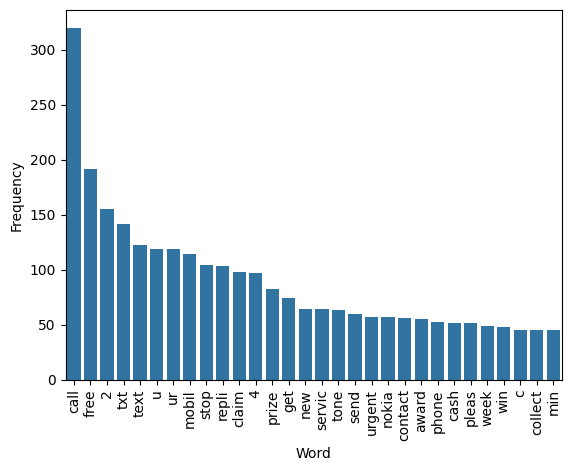

In [48]:
sns.barplot(x="Word", y="Frequency", data=df_common_words)
plt.xticks(rotation='vertical')  
plt.show()

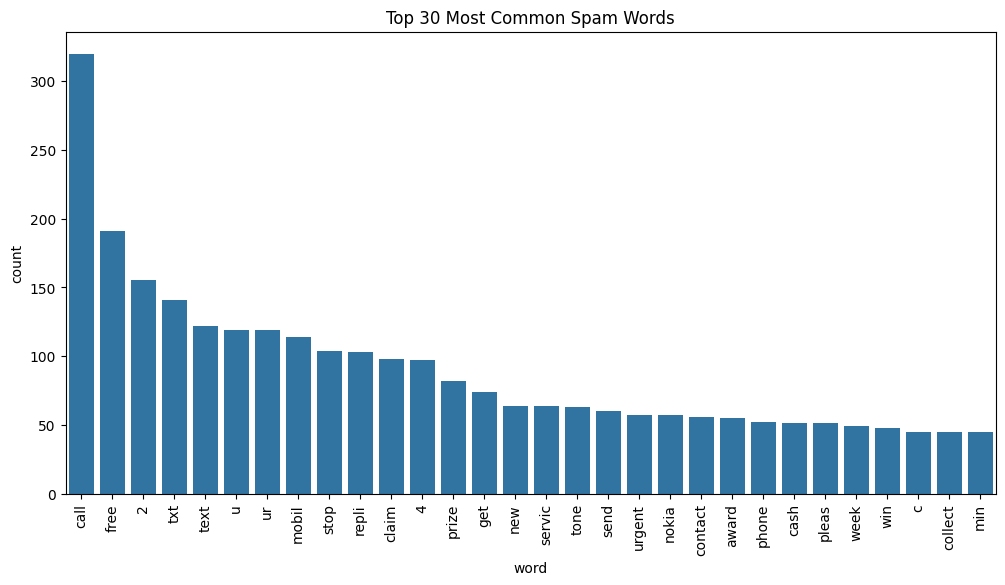

In [49]:
"""sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30)[0],pd.DataFrame(Counter(spam_corpus).most_common(30)[1])))
plt.xticks(rotation = 'vertical')
plt.show()"""

# Step 1: Get top 30 most common words
common_words = Counter(spam_corpus).most_common(30)

# Step 2: Convert to DataFrame with proper column names
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Step 3: Plot using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_common)

# Step 4: Rotate x-axis labels for readability
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Spam Words')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)


35404

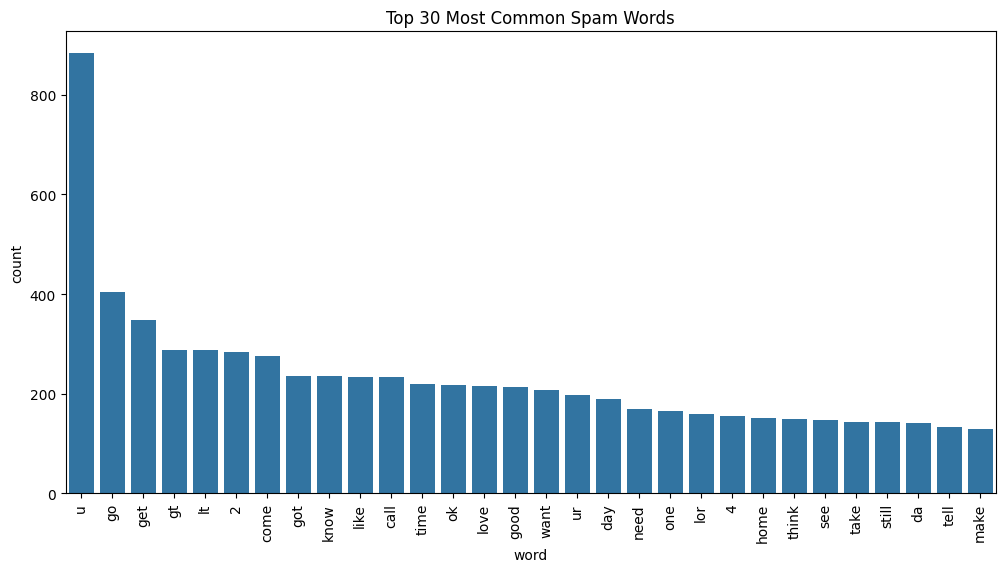

In [52]:
"""sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30)[0],pd.DataFrame(Counter(ham_corpus).most_common(30)[1])))
plt.xticks(rotation = 'vertical')
plt.show()"""

# Step 1: Get top 30 most common words
common_words = Counter(ham_corpus).most_common(30)

# Step 2: Convert to DataFrame with proper column names
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Step 3: Plot using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_common)

# Step 4: Rotate x-axis labels for readability
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Spam Words')
plt.show()

* Text feature Extraction or Vecotorization

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [55]:
X.shape

(5169, 6708)

In [56]:
y = df['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

### Modelling Phase

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 22)

### 📊 Model Training and Evaluation
To identify the best-performing machine learning model, we trained and evaluated multiple classifiers on our dataset. The following models were included in the comparison:

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC                      
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier


In [62]:
svc= SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver= 'saga', penalty = 'elasticnet',l1_ratio=0.5)
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()


In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB' : mnb,
    'GN' : gnb,
    'BN' : bnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc, 
    'AdaBoost' : abc, 
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
}    

In [64]:
from sklearn.metrics import accuracy_score as sk_accuracy_score, precision_score as sk_precision_score

def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = sk_accuracy_score(y_test, y_pred)  # scikit-learn function  used to avoid overriding problem
    precision = sk_precision_score(y_test, y_pred)  
    return accuracy, precision

In [65]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9807692307692307)

In [66]:


accuracy_scores = []  # list ka naam change kar diya
precision_scores = []  # list ka naam change kar diya

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("for", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


for SVC
Accuracy -  0.9758220502901354
Precision -  0.9807692307692307
for KN
Accuracy -  0.9052224371373307
Precision -  1.0
for NB
Accuracy -  0.9593810444874274
Precision -  1.0
for GN
Accuracy -  0.8607350096711799
Precision -  0.4585152838427948
for BN
Accuracy -  0.9729206963249516
Precision -  0.9801980198019802
for DT
Accuracy -  0.9410058027079303
Precision -  0.8404255319148937
for LR
Accuracy -  0.9487427466150871
Precision -  0.95
for RF
Accuracy -  0.9671179883945842
Precision -  1.0
for AdaBoost
Accuracy -  0.9342359767891683
Precision -  0.8433734939759037
for Bgc
Accuracy -  0.960348162475822
Precision -  0.9117647058823529
for ETC
Accuracy -  0.9729206963249516
Precision -  1.0
for GBDT
Accuracy -  0.9593810444874274
Precision -  0.9560439560439561


In [67]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values("Precision", ascending=False)

In [68]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.959381,1.000000
10,ETC,0.972921,1.000000
7,RF,0.967118,1.000000
0,SVC,0.975822,0.980769
4,BN,0.972921,0.980198
11,GBDT,0.959381,0.956044
6,LR,0.948743,0.950000
9,Bgc,0.960348,0.911765
8,AdaBoost,0.934236,0.843373


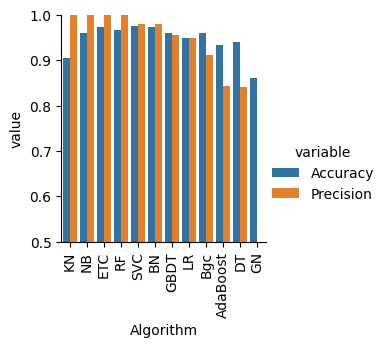

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the performance_df DataFrame
performance_df_melted = performance_df.melt(id_vars=['Algorithm'], value_vars=['Accuracy', 'Precision'],
                                            var_name='variable', value_name='value')

# Now plot
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df_melted, kind='bar', height=3)
plt.ylim(0.5, 1.0)  # Adjust y-axis range to focus on the values of accuracy/precision
plt.xticks(rotation='vertical')  # Rotate x-axis labels to make them readable
plt.show()


In [70]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb')) 
pickle.dump(mnb, open('model.pkl', 'wb'))